In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from math import ceil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rcParams

from evaluate import evaluate
from generate_data import generate_data
from model import get_predictions

In [3]:
plt.style.use('dark_background')
rcParams['figure.figsize'] = 16, 6

In [4]:
data = generate_data()
data

,y
ds,
2010-01-01,0.360458
2010-01-02,1.126528
2010-01-03,1.709483
2010-01-04,2.328263
2010-01-05,2.905436
...,...
2013-10-27,2.013790
2013-10-28,2.780354
2013-10-29,3.831688


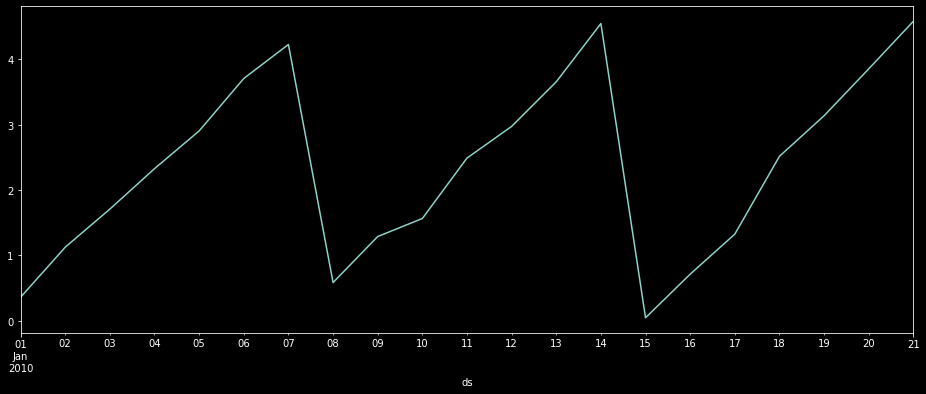

In [5]:
data.y.head(21).plot();

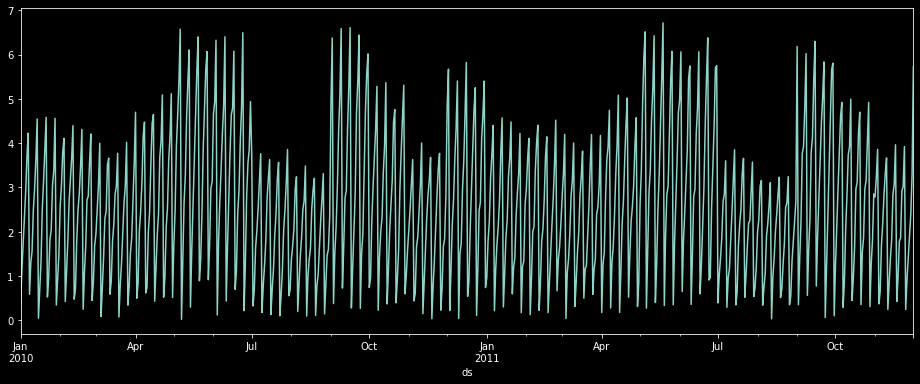

In [6]:
data.y.head(700).plot();

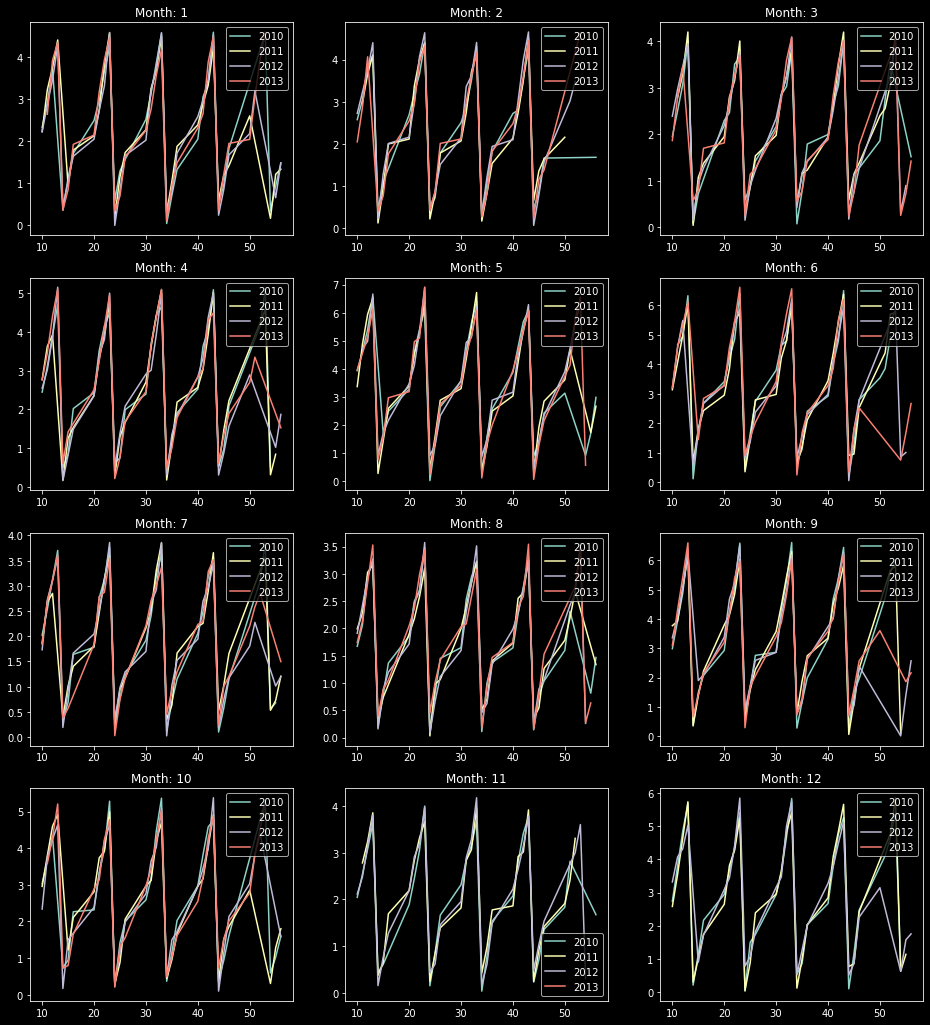

In [7]:
data['month'] = data.index.month
data['year'] = data.index.year

years = data.year.unique()
months = data.month.unique()

n_cols = 3
n_rows = ceil(months.size / 3)
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols,
                       figsize=(4*n_rows, 6*n_cols))

for axi, (i, month) in zip(ax.flat, enumerate(months)):
    month_data = data[data.month == month].copy()
    weekofmonth = month_data.index.day // 7 + 1
    dayofweek = month_data.index.dayofweek
    month_data.index = [10*w + dow for w, dow in zip(weekofmonth, dayofweek)]
    month_data = month_data.sort_index()
    for year in years:
        month_data[month_data.year == year].y.plot(ax=axi, label=year)
    axi.set_title(f'Month: {month}')
    axi.legend()

MSE: 0.06


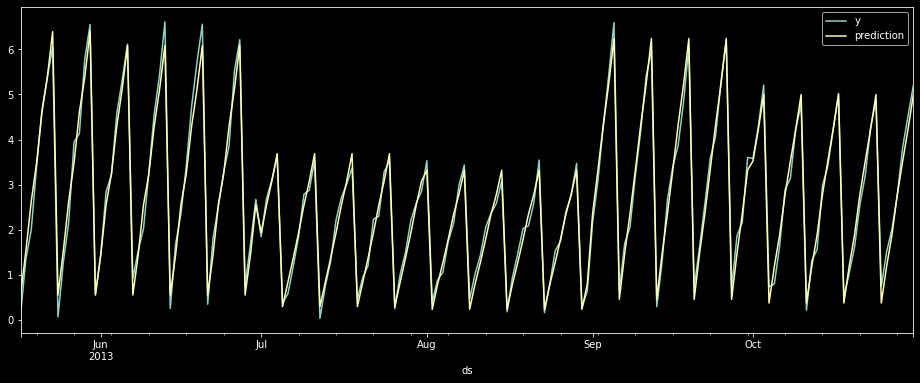

In [8]:
test_horizon = 28*6
evaluate(test_horizon)
preds = get_predictions(data.head(-test_horizon), test_horizon)
y_true = data.tail(test_horizon).copy()
y_true['prediction'] = preds
y_true[['y', 'prediction']].plot();